In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
dataset_path = '/content/drive/My Drive/Pneumonia_Detection_Project/Pneumonia_Dataset'

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ConvNeXtBase
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Define the input size for ConvNeXtBase
IMG_SIZE = (224, 224)
BATCH_SIZE = 256  # Reduced batch size for ConvNeXtBase

# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.convnext.preprocess_input,  # ConvNeXtBase preprocessing
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

# Load training data
train_generator = datagen.flow_from_directory(
    '/content/drive/My Drive/Pneumonia_Detection_Project/Pneumonia_Dataset/train',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
)

# Load validation data
validation_generator = datagen.flow_from_directory(
    '/content/drive/My Drive/Pneumonia_Detection_Project/Pneumonia_Dataset/train',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
)

# Load and preprocess test images
test_generator = datagen.flow_from_directory(
    '/content/drive/My Drive/Pneumonia_Detection_Project/Pneumonia_Dataset/test',  # Path to the test dataset
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 4695 images belonging to 2 classes.
Found 521 images belonging to 2 classes.
Found 640 images belonging to 2 classes.


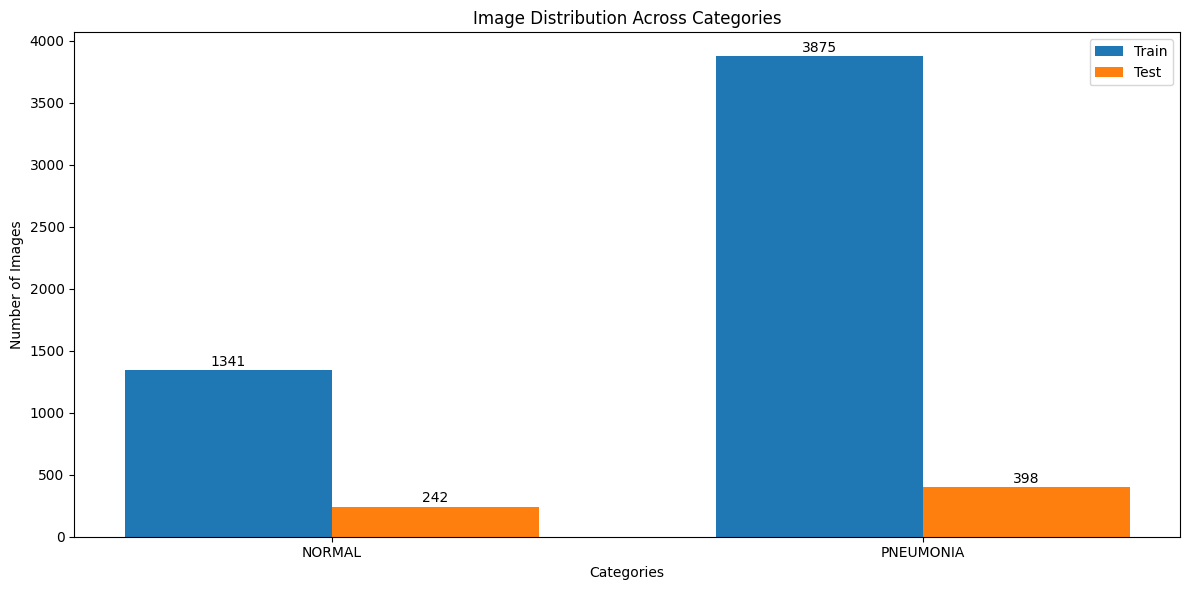

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

# Define your data paths
train_data_path = '/content/drive/My Drive/Pneumonia_Detection_Project/Pneumonia_Dataset/train'
test_data_path = '/content/drive/My Drive/Pneumonia_Detection_Project/Pneumonia_Dataset/test'

# Define your categories
categories = ['NORMAL', 'PNEUMONIA']  # Use your actual categories

# Initialize counts for each category
train_counts = {category: 0 for category in categories}
test_counts = {category: 0 for category in categories}

# Count images in train dataset
for category in categories:
    category_path = os.path.join(train_data_path, category)
    train_counts[category] = len(os.listdir(category_path))

# Count images in test dataset
for category in categories:
    category_path = os.path.join(test_data_path, category)
    test_counts[category] = len(os.listdir(category_path))

df = pd.DataFrame({
    'Category': categories,  # Use your actual categories
    'Train Count': list(train_counts.values()),
    'Test Count': list(test_counts.values())
})

# Get the positions for the bars
x = np.arange(len(categories))  # Use your actual categories
width = 0.35  # Width of the bars

# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, df['Train Count'], width, label='Train')
rects2 = ax.bar(x + width/2, df['Test Count'], width, label='Test')

# Add labels, title, and legend
ax.set_xlabel('Categories')  # Update the x-axis label
ax.set_ylabel('Number of Images')
ax.set_title('Image Distribution Across Categories')  # Update the title
ax.set_xticks(x)
ax.set_xticklabels(categories)  # Use your actual categories
ax.legend()

# Add count labels
for index, row in df.iterrows():
    ax.text(x=index - width/2, y=row['Train Count'] + 10, s=str(row['Train Count']), ha='center', va='bottom', fontsize=10)
    ax.text(x=index + width/2, y=row['Test Count'] + 10, s=str(row['Test Count']), ha='center', va='bottom', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

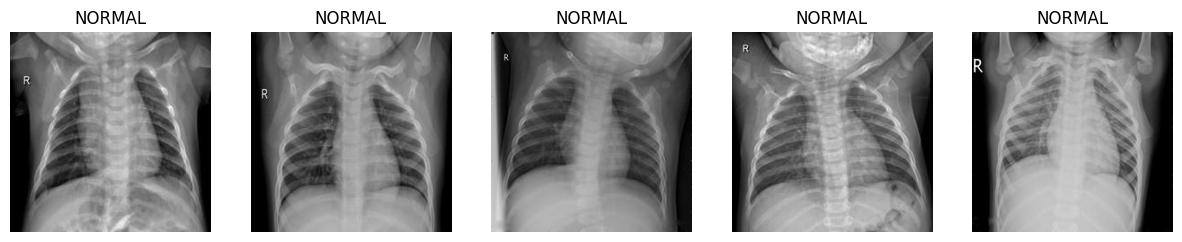

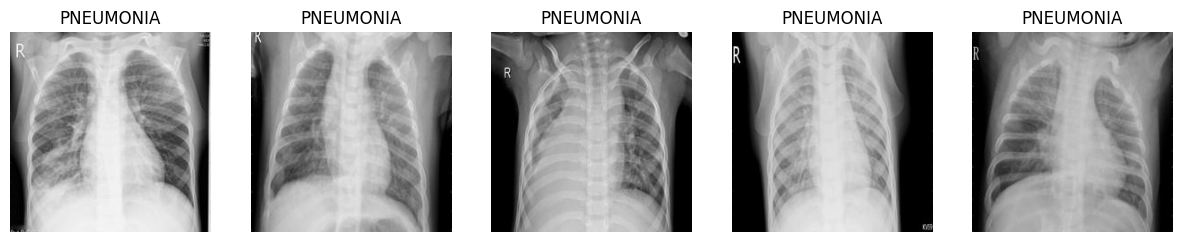

In [5]:
import matplotlib.pyplot as plt
import os
from PIL import Image
import random

def plot_sample_images(img_paths, labels, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i, img_path in enumerate(img_paths[:num_images]):
        # Open image using PIL
        img = Image.open(img_path)

        # Convert to RGB explicitly
        img = img.convert('RGB')

        axes[i].imshow(img)  # Display using PIL's image data
        axes[i].set_title(labels[i])
        axes[i].axis('off')
    plt.show()

# Define your data paths and categories
data_path = '/content/drive/My Drive/Pneumonia_Detection_Project/Pneumonia_Dataset/train'
categories = ['NORMAL', 'PNEUMONIA']

for category in categories:
    category_path = os.path.join(data_path, category)
    all_img_files = os.listdir(category_path)
    random_img_files = random.sample(all_img_files, 5)
    img_paths = [os.path.join(category_path, img_file) for img_file in random_img_files]
    plot_sample_images(img_paths, [category] * len(img_paths))

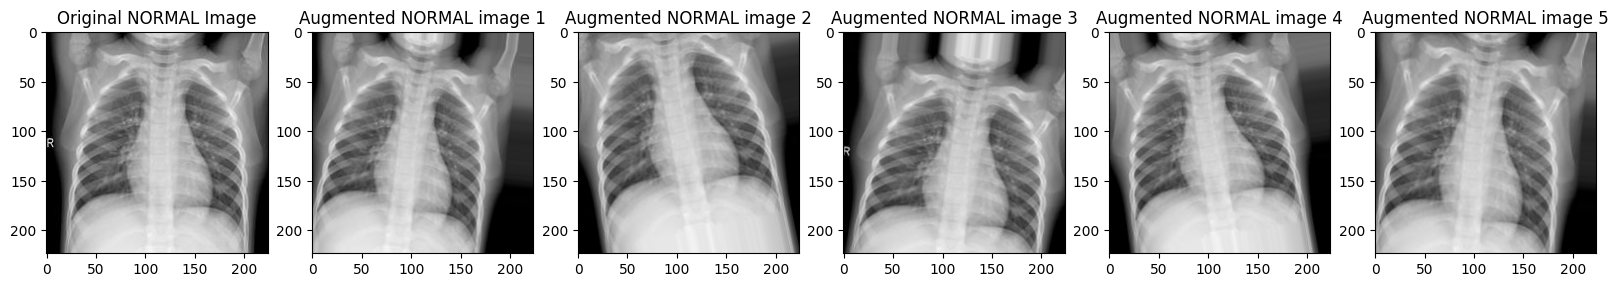

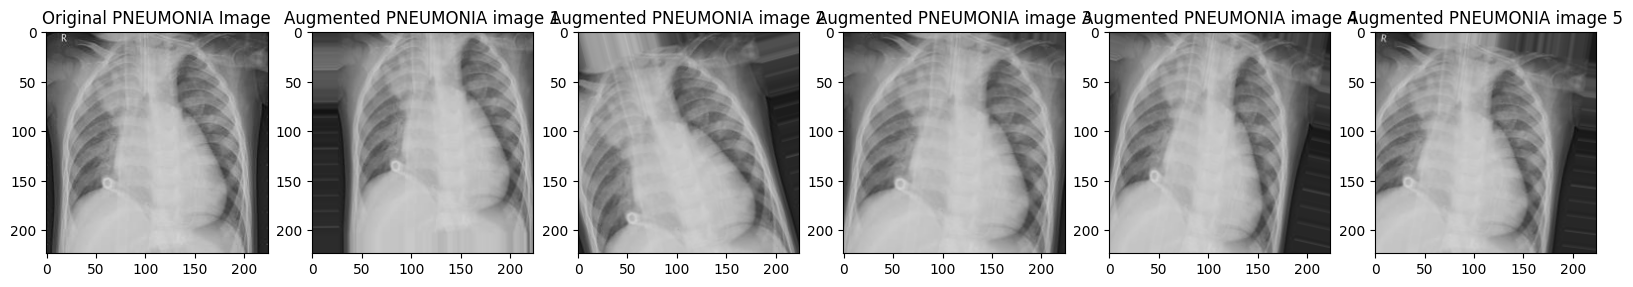

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

# Define data augmentation with adjustments for Zalando Fashion Dataset
datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=15,  # Reduced rotation
    width_shift_range=0.1,  # Reduced width shift
    height_shift_range=0.1,  # Reduced height shift
    # horizontal_flip=True,  # Consider removing or keeping based on directionality
    zoom_range=0.1,  # Added zoom
    # shear_range=0.1, # Optional: Add shear cautiously
    fill_mode='nearest'
)

# Define your data paths and fashion categories
data_path = '/content/drive/My Drive/Pneumonia_Detection_Project/Pneumonia_Dataset/train'
categories = ['NORMAL', 'PNEUMONIA']

for category in categories:
    category_path = os.path.join(data_path, category)
    # Get one sample image from each category
    img_path = os.path.join(category_path, os.listdir(category_path)[0])

    # Load a single image and apply augmentation
    img = Image.open(img_path).resize((224, 224))
    # Convert the image to RGB if it's not already
    img = img.convert('RGB')
    img = np.array(img)
    img = img.reshape((1, 224, 224, 3))

    # Use __next__() instead of next() and get the first item from the batch
    augmented_imgs = [datagen.flow(img, batch_size=1).__next__()[0] for _ in range(5)]

    fig, axes = plt.subplots(1, 6, figsize=(20, 5))
    axes[0].imshow(img[0].astype('uint8'))  # Original image
    axes[0].set_title(f"Original {category} Image")

    for i, aug_img in enumerate(augmented_imgs):
        # Rescale augmented image to 0-255 and convert to uint8
        aug_img = (aug_img * 255).astype('uint8')
        axes[i + 1].imshow(aug_img)
        axes[i + 1].set_title(f"Augmented {category} image {i+1}")

    plt.show()

In [7]:
from tensorflow.keras.applications import ConvNeXtBase
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Create Precision and Recall metrics outside the function
precision_metric = Precision()
recall_metric = Recall()

# Custom F1-score metric
def f1_score(y_true, y_pred):
    # Use the pre-created metrics instead of creating new ones
    precision = precision_metric(y_true, y_pred)
    recall = recall_metric(y_true, y_pred)
    f1 = 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))
    return f1

# Apply mixed precision for faster training and less GPU load
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

# Load pre-trained ConvNeXtBase model without the top classification layer
base_model = ConvNeXtBase(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model to retain pre-trained weights
base_model.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(2, activation='softmax')(x)  # 2 output neurons for binary classification

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy', precision_metric, recall_metric, f1_score])

350926856/350926856 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [8]:
# Calculate class weights
train_data_path = '/content/drive/My Drive/Pneumonia_Detection_Project/Pneumonia_Dataset/train'
categories = ['NORMAL', 'PNEUMONIA']
train_counts = {category: 0 for category in categories}

for category in categories:
    category_path = os.path.join(train_data_path, category)
    train_counts[category] = len(os.listdir(category_path))

total_samples = sum(train_counts.values())
class_weights = {i: total_samples / count for i, count in enumerate(train_counts.values())}
print(class_weights)

{0: 3.889634601043997, 1: 1.3460645161290323}


In [9]:
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ cast (Cast)               │ (None, 224, 224, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_base_prestem_no… │ (None, 224, 224, 3)    │              0 │ cast[0][0]             │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_base_stem        │ (None, 56, 56, 128)    │          6,528 │ convnext_base_prestem… │
│ (Sequential)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_base_stage_0_bl… │ (None, 56, 56, 128)    │          6,400 │ convnext_base_stem[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_base_stage_0_bl… │ (None, 56, 56, 128)    │            256 │ convnext_base_stage_0… │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_base_stage_0_bl… │ (None, 56, 56, 512)    │         66,048 │ convnext_base_stage_0… │
│ (Dense)                   │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_base_stage_0_bl… │ (None, 56, 56, 512)    │              0 │ convnext_base_stage_0… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_base_stage_0_bl… │ (None, 56, 56, 128)    │         65,664 │ convnext_base_stage_0… │
│ (Dense)                   │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_base_stage_0_bl… │ (None, 56, 56, 128)    │            128 │ convnext_base_stage_0… │
│ (LayerScale)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_base_stage_0_bl… │ (None, 56, 56, 128)    │              0 │ convnext_base_stage_0… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 56, 56, 128)    │              0 │ convnext_base_stem[0]… │
│                           │                        │                │ convnext_base_stage_0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_base_stage_0_bl… │ (None, 56, 56, 128)    │          6,400 │ add[0][0]              │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_base_stage_0_bl… │ (None, 56, 56, 128)    │            256 │ convnext_base_stage_0… │
│ (LayerNormalization) 

 Total params: 88,618,114 (338.05 MB)

 Trainable params: 1,051,650 (4.01 MB)

 Non-trainable params: 87,566,464 (334.04 MB)

In [10]:


model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), f1_score]
)

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=30,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    class_weight=class_weights
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 428s 21s/step - accuracy: 0.6685 - f1_score: 0.6262 - loss: 3.4337 - precision: 0.6687 - recall: 0.6685 - val_accuracy: 0.8086 - val_f1_score: 0.7336 - val_loss: 0.5243 - val_precision: 0.8086 - val_recall: 0.8086
Epoch 2/30
 1/18 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - accuracy: 0.8125 - f1_score: 0.7393 - loss: 0.7031 - precision: 0.8125 - recall: 0.8125

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 365ms/step - accuracy: 0.8125 - f1_score: 0.7393 - loss: 0.7031 - precision: 0.8125 - recall: 0.8125 - val_accuracy: 0.8496 - val_f1_score: 0.7465 - val_loss: 0.4132 - val_precision: 0.8496 - val_recall: 0.8496
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 59s 3s/step - accuracy: 0.9057 - f1_score: 0.7771 - loss: 0.4589 - precision: 0.9057 - recall: 0.9056 - val_accuracy: 0.9023 - val_f1_score: 0.8243 - val_loss: 0.2618 - val_precision: 0.9023 - val_recall: 0.9023
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 375ms/step - accuracy: 0.9219 - f1_score: 0.8274 - loss: 0.3024 - precision: 0.9219 - recall: 0.9219 - val_accuracy: 0.8887 - val_f1_score: 0.8296 - val_loss: 0.2824 - val_precision: 0.8887 - val_recall: 0.8887
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step - accuracy: 0.9306 - f1_score: 0.8403 - loss: 0.3357 - precision: 0.9306 - recall: 0.9306 - val_accuracy: 0.9141 - val_f1_score: 0.8605 - val_loss: 0.2072 - val_precision: 0.9141 - val_recall: 0.9141
Epoch 6

In [11]:
# Evaluate the model and unpack the returned values appropriately
test_loss, test_accuracy, test_precision, test_recall, test_f1_score = model.evaluate(validation_generator)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

3/3 ━━━━━━━━━━━━━━━━━━━━ 23s 10s/step - accuracy: 0.9453 - f1_score: 0.9305 - loss: 0.1102 - precision: 0.9453 - recall: 0.9453
Test Accuracy: 94.63%


In [12]:
# Unfreeze the base model for fine-tuning
base_model.trainable = True

# Use a lower learning rate for fine-tuning
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), f1_score]
)

# Fine-tune the model
fine_tune_history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=30,  # Add more epochs for fine-tuning
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    class_weight=class_weights
)

Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 226s 6s/step - accuracy: 0.9522 - f1_score: 0.9309 - loss: 0.2488 - precision: 0.9522 - recall: 0.9522 - val_accuracy: 0.9434 - val_f1_score: 0.9319 - val_loss: 0.1387 - val_precision: 0.9434 - val_recall: 0.9434
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 372ms/step - accuracy: 0.9727 - f1_score: 0.9321 - loss: 0.1315 - precision: 0.9727 - recall: 0.9727 - val_accuracy: 0.9434 - val_f1_score: 0.9321 - val_loss: 0.1505 - val_precision: 0.9434 - val_recall: 0.9434
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 63s 3s/step - accuracy: 0.9598 - f1_score: 0.9325 - loss: 0.1827 - precision: 0.9598 - recall: 0.9598 - val_accuracy: 0.9355 - val_f1_score: 0.9337 - val_loss: 0.1498 - val_precision: 0.9355 - val_recall: 0.9355
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 364ms/step - accuracy: 0.9425 - f1_score: 0.9337 - loss: 0.1718 - precision: 0.9425 - recall: 0.9425 - val_accuracy: 0.9551 - val_f1_score: 0.9338 - val_loss: 0.1057 - val_precision: 0.9551 - val_recall: 0.

In [13]:
# Evaluate the model and unpack the returned values appropriately
test_loss, test_accuracy, test_precision, test_recall, test_f1_score = model.evaluate(validation_generator)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.9705 - f1_score: 0.9544 - loss: 0.0747 - precision: 0.9705 - recall: 0.9705
Test Accuracy: 97.12%


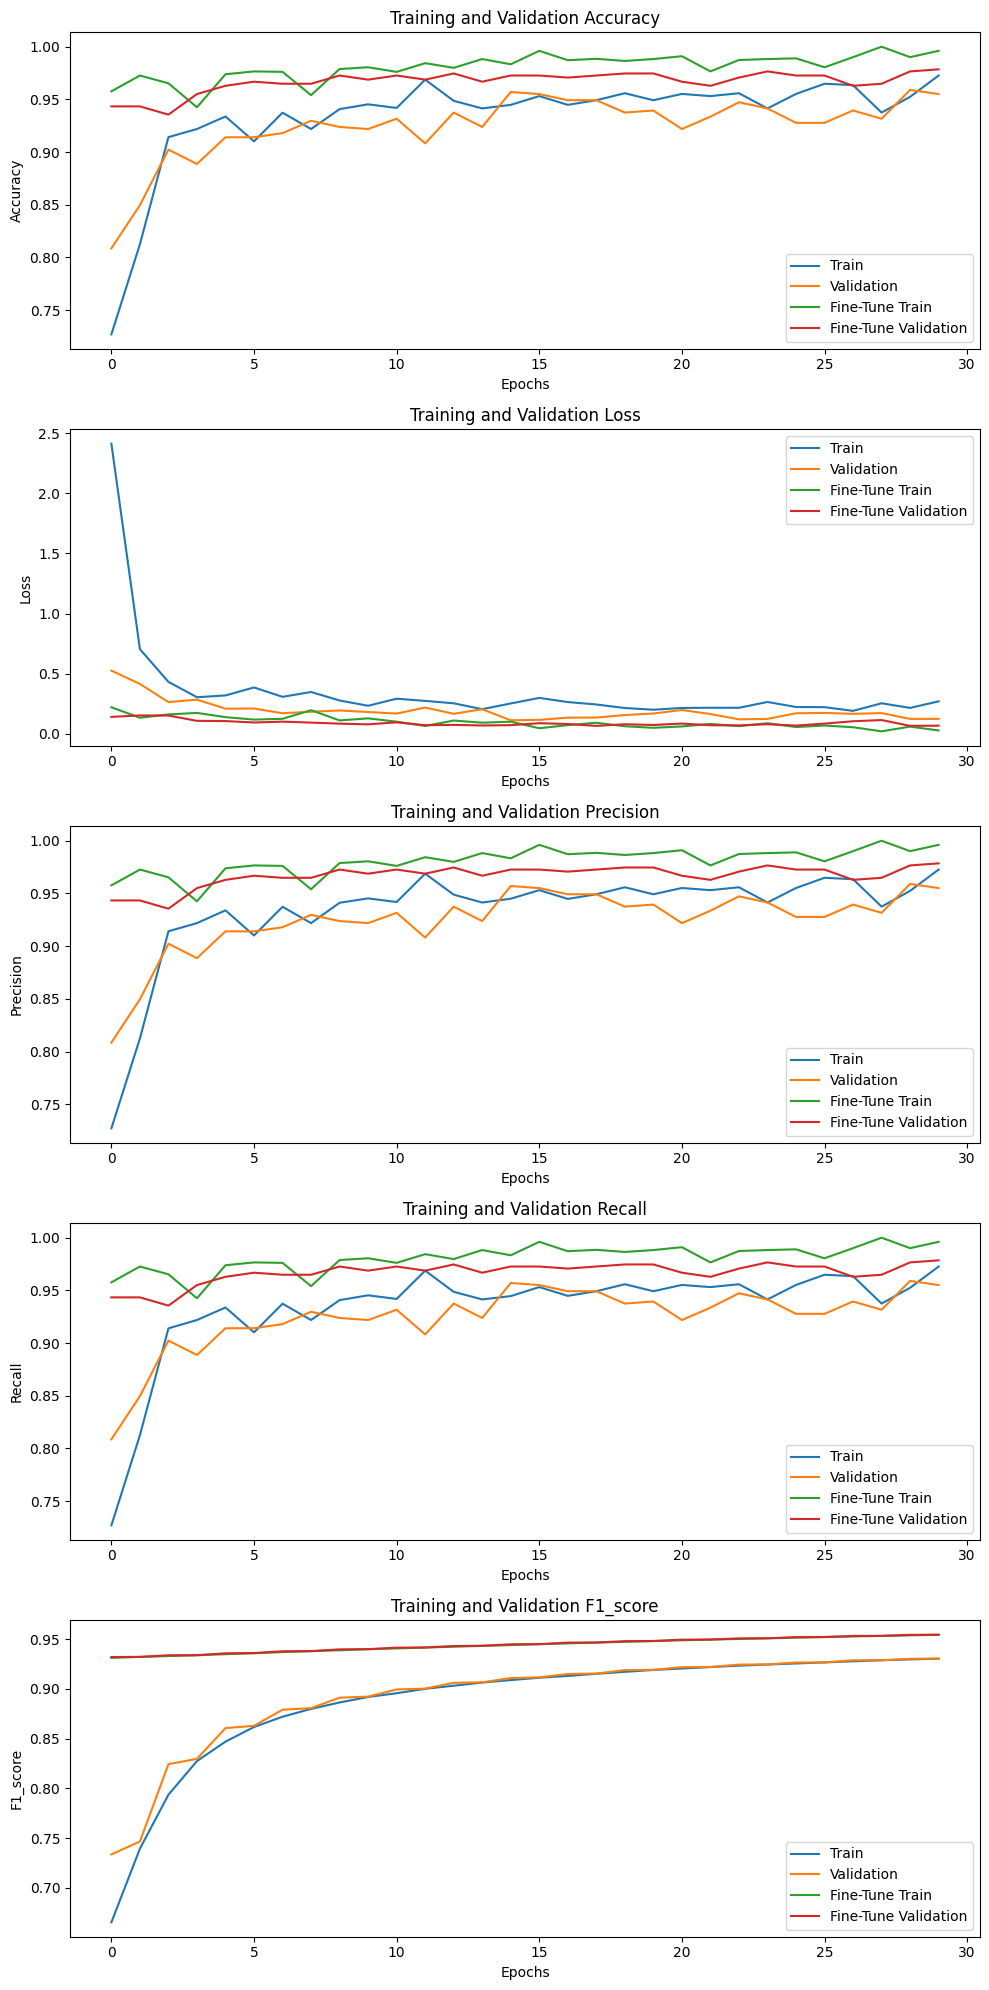

In [14]:
import matplotlib.pyplot as plt

# Define metrics to plot
metrics = ['accuracy', 'loss', 'precision', 'recall', 'f1_score']

# Create a figure and subplots
fig, axes = plt.subplots(len(metrics), 1, figsize=(10, 20))  # Adjust figsize as needed

# Loop through metrics and plot each one
for i, metric in enumerate(metrics):
    ax = axes[i]

    # Plot training and validation curves
    ax.plot(history.history[metric], label='Train')
    ax.plot(history.history['val_' + metric], label='Validation')
    ax.plot(fine_tune_history.history[metric], label='Fine-Tune Train')
    ax.plot(fine_tune_history.history['val_' + metric], label='Fine-Tune Validation')

    # Set labels and title
    ax.set_xlabel('Epochs')
    ax.set_ylabel(metric.capitalize())  # Capitalize metric name for title
    ax.set_title(f'Training and Validation {metric.capitalize()}')
    ax.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━

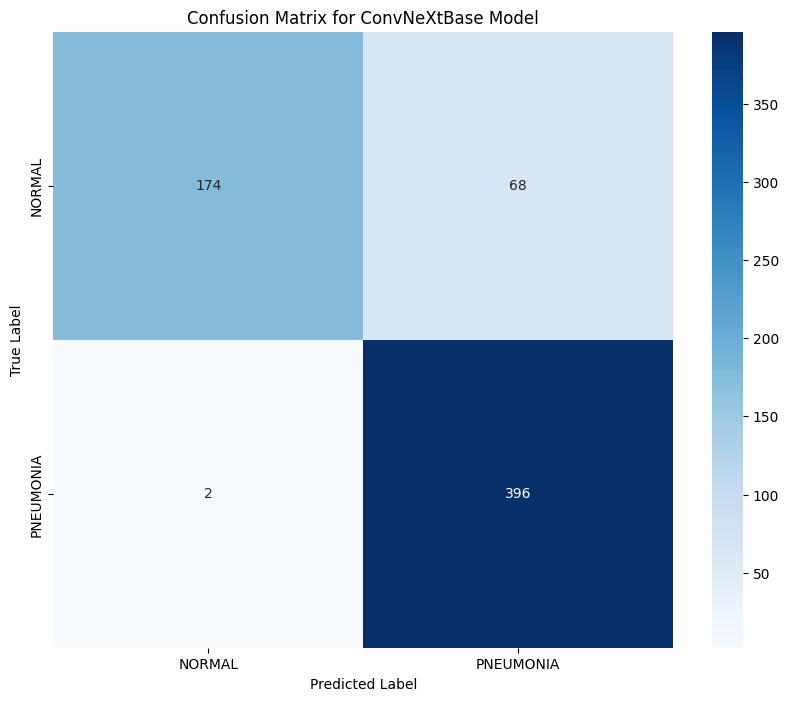

In [15]:
import numpy as np
import os
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define your Pneumonia categories
categories = ['NORMAL', 'PNEUMONIA']

# Update the path to your Pneumonia test dataset
dataset_path = '/content/drive/My Drive/Pneumonia_Detection_Project/Pneumonia_Dataset/test'

# Initialize empty lists to store all predicted and true categories
all_predicted_categories = []
all_true_categories = []

# Loop through each category (NORMAL, PNEUMONIA)
for category in categories:
    # Define the path to the category folder in the test dataset
    category_folder_path = os.path.join(dataset_path, category)

    # Get a list of all image files in the category folder
    image_files = [f for f in os.listdir(category_folder_path) if os.path.isfile(os.path.join(category_folder_path, f))]

    # Loop through each image file and make a prediction
    for image_file in image_files:
        # Construct the full path to the image
        img_path = os.path.join(category_folder_path, image_file)

        # Load and preprocess the image
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = tf.keras.applications.convnext.preprocess_input(img_array)  # ConvNeXt preprocessing

        # Make the prediction
        prediction = model.predict(img_array)

        # Get the predicted class index and category label
        predicted_class_index = np.argmax(prediction)
        predicted_category = categories[predicted_class_index]

        # Append the predicted and true categories to the lists
        all_predicted_categories.append(predicted_category)
        all_true_categories.append(category)  # True category is the current category

# Convert the lists to NumPy arrays
all_predicted_categories = np.array(all_predicted_categories)
all_true_categories = np.array(all_true_categories)

# Create the confusion matrix
cm_all_categories = confusion_matrix(all_true_categories, all_predicted_categories, labels=categories)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm_all_categories, annot=True, fmt="d", cmap="Blues",
            xticklabels=categories, yticklabels=categories)
plt.title("Confusion Matrix for ConvNeXtBase Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━

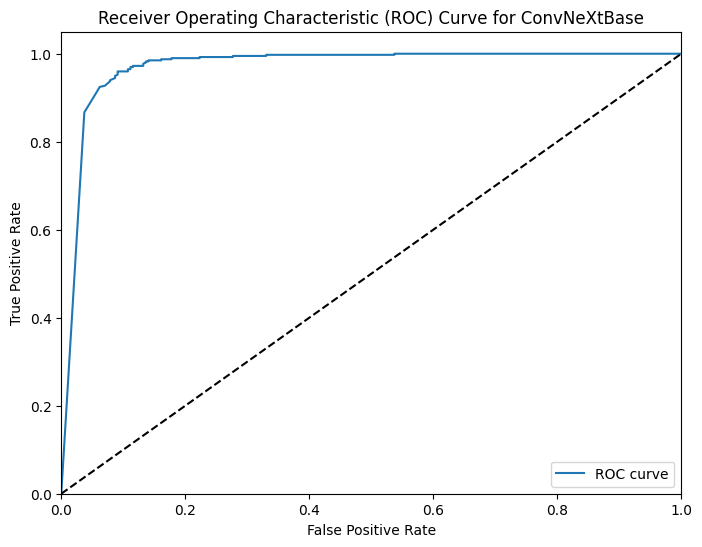

In [16]:
import numpy as np
import os
from tensorflow.keras.preprocessing import image
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import tensorflow as tf  # Added for ConvNeXt preprocessing

# Define your Pneumonia categories
categories = ['NORMAL', 'PNEUMONIA']

# Path to your Pneumonia test dataset
test_folder_path = '/content/drive/My Drive/Pneumonia_Detection_Project/Pneumonia_Dataset/test'

# Initialize lists to store true and predicted probabilities
true_labels = []
predicted_probabilities = []

# Loop through each category folder in the test dataset
for category_index, category in enumerate(categories):
    category_folder_path = os.path.join(test_folder_path, category)

    # Loop through images in the category folder
    for image_file in os.listdir(category_folder_path):
        img_path = os.path.join(category_folder_path, image_file)
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)

        # Apply ConvNeXt preprocessing
        img_array = tf.keras.applications.convnext.preprocess_input(img_array)

        # Make prediction (get probabilities)
        prediction = model.predict(img_array)[0]  # Get probabilities for both classes

        # Append true label (one-hot encoded) and predicted probabilities
        true_label = np.zeros(len(categories))
        true_label[category_index] = 1  # One-hot encoding
        true_labels.append(true_label)
        predicted_probabilities.append(prediction)

# Convert lists to NumPy arrays
true_labels = np.array(true_labels)
predicted_probabilities = np.array(predicted_probabilities)

# Plot ROC curve for the 'PNEUMONIA' class (class index 1)
fpr, tpr, _ = roc_curve(true_labels[:, 1], predicted_probabilities[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for ConvNeXtBase')
plt.legend(loc="lower right")
plt.show()

In [17]:
model.save('/content/drive/My Drive/Pneumonia_Detection_Project/Pneumonia_ConvNeXtBase.h5')

In [18]:
!pip install tf_keras_vis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 1.2 MB/s eta 0:00:00


In [21]:
import numpy as np
import os
from tensorflow.keras.preprocessing import image
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils import normalize
import matplotlib.pyplot as plt
from tensorflow.keras.applications import convnext
from tensorflow.keras.layers import Conv2D  # Import Conv2D for layer identification


# Define Pneumonia categories
categories = ['NORMAL', 'PNEUMONIA']

# Path to your Pneumonia test dataset
test_folder_path = '/content/drive/My Drive/Pneumonia_Detection_Project/Pneumonia_Dataset/test'


# Function to find the last convolutional layer
def find_last_conv_layer(model):
    for layer in reversed(model.layers):
        if isinstance(layer, Conv2D):
            return layer.name
    return None


# Define Grad-CAM function with dynamic layer selection
def grad_cam_heatmap(model, image):
    # Get the last convolutional layer name
    last_conv_layer_name = find_last_conv_layer(model)

    if last_conv_layer_name is None:
        raise ValueError("No convolutional layers found in the model.")

    gradcam = Gradcam(model, clone=False)

    def loss(output):
        predicted_class = np.argmax(model.predict(image))
        return output[:, predicted_class]

    # Find the actual layer by name
    layer = model.get_layer(last_conv_layer_name)

    # Use the found layer directly
    cam = gradcam(loss, image, penultimate_layer=layer)
    cam = normalize(cam)
    return cam


# Loop through each category folder in the test dataset
for category in categories:
    print(f"Processing category: {category}")
    category_folder_path = os.path.join(test_folder_path, category)

    # Get a list of image files in the category folder
    image_files = os.listdir(category_folder_path)

    # Visualize heatmaps for a few images (e.g., 3)
    for image_file in image_files[:3]:
        img_path = os.path.join(category_folder_path, image_file)

        # Load and preprocess the image
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = convnext.preprocess_input(x)

        # Generate heatmap
        heatmap = grad_cam_heatmap(model, x)
        heatmap = np.uint8(255 * heatmap[0])

        # Display original image and heatmap
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))

        axes[0].imshow(img)
        axes[0].set_title(f"Original Image: {category}")
        axes[0].axis('off')

        axes[1].imshow(img)
        axes[1].imshow(heatmap, cmap='jet', alpha=0.5)
        predicted_category = categories[np.argmax(model.predict(x))]
        axes[1].set_title(f"Predicted Category: {predicted_category}")
        axes[1].axis('off')

        plt.tight_layout()
        plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [22]:
import numpy as np
import os
from tensorflow.keras.preprocessing import image
from tf_keras_vis.gradcam import GradcamPlusPlus  # Import GradcamPlusPlus
from tf_keras_vis.utils import normalize
import matplotlib.pyplot as plt
from tensorflow.keras.applications import convnext  # Import ConvNeXt preprocessing
from tensorflow.keras.layers import Conv2D  # Import Conv2D for layer identification

# Define Pneumonia categories
categories = ['NORMAL', 'PNEUMONIA']

# Path to your Pneumonia test dataset
test_folder_path = '/content/drive/My Drive/Pneumonia_Detection_Project/Pneumonia_Dataset/test'

# Function to find the last convolutional layer
def find_last_conv_layer(model):
    for layer in reversed(model.layers):
        if isinstance(layer, Conv2D):
            return layer.name
    return None

# Define Grad-CAM++ function with dynamic layer selection
def grad_cam_plusplus_heatmap(model, image):
    # Get the last convolutional layer name
    last_conv_layer_name = find_last_conv_layer(model)

    if last_conv_layer_name is None:
        raise ValueError("No convolutional layers found in the model.")

    gradcam_plusplus = GradcamPlusPlus(model, clone=False)  # Use GradcamPlusPlus

    def loss(output):
        predicted_class = np.argmax(model.predict(image))
        return output[:, predicted_class]

    # Find the actual layer by name
    layer = model.get_layer(last_conv_layer_name)

    # Use the found layer directly
    cam = gradcam_plusplus(loss, image, penultimate_layer=layer)  # Apply GradcamPlusPlus
    cam = normalize(cam)
    return cam

# Loop through each category folder in the test dataset
for category in categories:
    print(f"Processing category: {category}")
    category_folder_path = os.path.join(test_folder_path, category)

    # Get a list of image files in the category folder
    image_files = os.listdir(category_folder_path)

    # Visualize heatmaps for a few images (e.g., 3)
    for image_file in image_files[:3]:  # Adjust the number of images to visualize
        img_path = os.path.join(category_folder_path, image_file)

        # Load and preprocess the image
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = convnext.preprocess_input(x)  # Apply ConvNeXt preprocessing

        # Generate Grad-CAM++ heatmap
        heatmap = grad_cam_plusplus_heatmap(model, x)
        heatmap = np.uint8(255 * heatmap[0])

        # Display original image and heatmap
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))

        axes[0].imshow(img)
        axes[0].set_title(f"Original Image: {category}")
        axes[0].axis('off')

        axes[1].imshow(img)
        axes[1].imshow(heatmap, cmap='jet', alpha=0.5)  # Overlay heatmap on original image
        predicted_category = categories[np.argmax(model.predict(x))]
        axes[1].set_title(f"Predicted Category: {predicted_category}")
        axes[1].axis('off')

        plt.tight_layout()
        plt.show()

Output hidden; open in https://colab.research.google.com to view.